In [1]:
#построить модель и улучшить ее

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge, Lasso
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv('laptop_price.csv', encoding='latin1')
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [5]:
df.shape

(1303, 13)

In [10]:
df.isna().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [9]:
df.nunique()

laptop_ID           1303
Company               19
Product              618
TypeName               6
Inches                18
ScreenResolution      40
Cpu                  118
Ram                    9
Memory                39
Gpu                  110
OpSys                  9
Weight               179
Price_euros          791
dtype: int64

Столбцы <code>*"laptop_ID"*</code> и <code>*"Product"*</code> не являются признаками, поэтому в регрессию не войдут ни в каком виде.

In [24]:
df1 = df.drop(['laptop_ID', 'Product'], axis=1)
df1.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00


Столбцы <code>*"Ram"*</code> и <code>*"Weight"*</code> можно преобразовать в количественные:

In [25]:
df1['Ram'] = df1['Ram'].str[:-2].astype('int')
df1['Weight'] = df1['Weight'].str[:-2].astype('float')

In [26]:
df1.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00


In [32]:
numerical = ['Inches', 'Ram', 'Weight']
catigorial = ['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Memory', 'Gpu', 'OpSys']

In [34]:
df1.shape

(1303, 11)

In [35]:
df1 = pd.get_dummies(df1, columns=catigorial)
df1.head(3)

,Inches,Ram,Weight,Price_euros,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,...,Gpu_Nvidia Quadro M620M,OpSys_Android,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS
0,13.3,8,1.37,1339.69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,13.3,8,1.34,898.94,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,15.6,8,1.86,575.00,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [36]:
df1.shape

(1303, 345)

### LinearRegression (без других преобразований)

In [38]:
X = df1.drop('Price_euros', axis=1) # объясняющие переменные
y = df1['Price_euros'] # зависимая переменная
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

In [40]:
# Обучение модели линейной регрессии
model = LinearRegression()
model.fit(train_X, train_y)

# Проверка качества модели на тестовом наборе
y_pred = model.predict(test_X)
mse = mean_squared_error(test_y, y_pred)
print(f'MSE на тестовом наборе: {mse}')

# проверяем r2
print(f"R2 на train: {model.score(train_X, train_y)}")
print(f"R2 на test: {model.score(test_X, test_y)}")

MSE на тестовом наборе: 7.386824613753422e+22
R2 на train: 0.9207282931726843
R2 на test: -1.37962101054231e+17


### LinearRegression (с удалением выбросов и стандартизацией)

In [45]:
# числовые характеристики:
df1['Price_euros'].describe()

count    1303.000000
mean     1123.686992
std       699.009043
min       174.000000
25%       599.000000
50%       977.000000
75%      1487.880000
max      6099.000000
Name: Price_euros, dtype: float64

<Axes: >

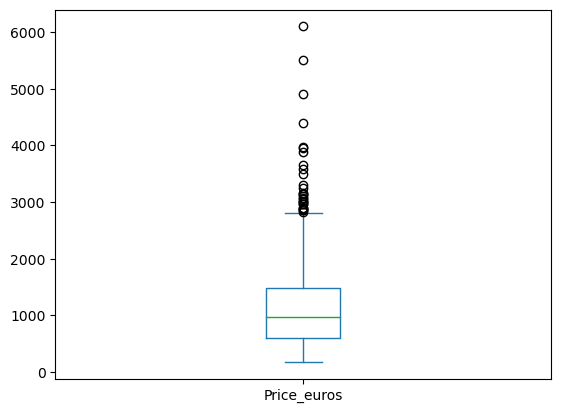

In [46]:
# boxplot:
df1['Price_euros'].plot(kind='box')

Выбросов слишком много, чтобы удалить их все. Поэтому удалим только самые крайние:

In [49]:
q_hi = df1["Price_euros"].quantile(0.99)
df1 = df1.query('Price_euros <= @q_hi').reset_index(drop=True)
df1.shape

(1263, 345)

In [50]:
X = df1.drop('Price_euros', axis=1) # объясняющие переменные
y = df1['Price_euros'] # зависимая переменная
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

In [51]:
# StandardScaler:
scaler = StandardScaler()
scaler.fit(train_X)
train_X = scaler.transform(train_X)
test_X = scaler.transform(test_X)

In [52]:
# Обучение модели линейной регрессии
model = LinearRegression()
model.fit(train_X, train_y)

# Проверка качества модели на тестовом наборе
y_pred = model.predict(test_X)
mse = mean_squared_error(test_y, y_pred)
print(f'MSE на тестовом наборе: {mse}')

# проверяем r2
print(f"R2 на train: {model.score(train_X, train_y)}")
print(f"R2 на test: {model.score(test_X, test_y)}")

MSE на тестовом наборе: 6.024443089759171e+32
R2 на train: 0.8606023784519944
R2 на test: -1.6830638580165465e+27


### Ridge

In [54]:
# Обучение модели линейной регрессии
model = Ridge()
model.fit(train_X, train_y)

# Проверка качества модели на тестовом наборе
y_pred = model.predict(test_X)
mse = mean_squared_error(test_y, y_pred)
print(f'MSE на тестовом наборе: {mse}')

# проверяем r2
print(f"R2 на train: {model.score(train_X, train_y)}")
print(f"R2 на test: {model.score(test_X, test_y)}")

MSE на тестовом наборе: 66332.27808643029
R2 на train: 0.8845548083515168
R2 на test: 0.8146858419877003


### Lasso

In [55]:
# Обучение модели линейной регрессии
model = Lasso()
model.fit(train_X, train_y)

# Проверка качества модели на тестовом наборе
y_pred = model.predict(test_X)
mse = mean_squared_error(test_y, y_pred)
print(f'MSE на тестовом наборе: {mse}')

# проверяем r2
print(f"R2 на train: {model.score(train_X, train_y)}")
print(f"R2 на test: {model.score(test_X, test_y)}")

MSE на тестовом наборе: 69319.95079644474
R2 на train: 0.8831312745997338
R2 на test: 0.8063391053966361
